Small dataset for linear regression from:<br>
http://people.sc.fsu.edu/~jburkardt/datasets/regression/x06.txt

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
x06 = pd.read_excel("x06.xlsx")
#      I,  the index;
#      A1, the age of the fish;
#      A2, the water temperature in degrees Celsius;
#      B,  the length of the fish.

In [3]:
x06.head(3)

,I,A1,A2,B
0,1,14,25,620
1,2,28,25,1315
2,3,41,25,2120


Text(0.5,0,'Length')

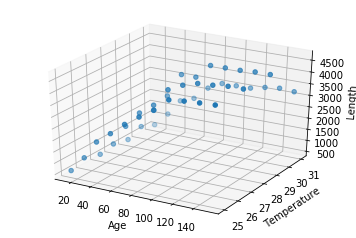

In [4]:
# Here is a simple plot of our data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x06["A1"], x06["A2"], x06["B"])
ax.set_xlabel("Age")
ax.set_ylabel("Temperature")
ax.set_zlabel("Length")

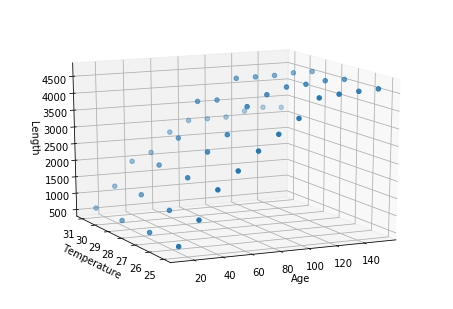

In [5]:
# But THIS method gives us better control over the "vantage point" from whence to view our data

# Make a 3D axis
fig = plt.figure(figsize=(6, 4))
ax1 = Axes3D(fig, azim=-115, elev=15)

# Plot the data on the axis
ax1.scatter(x06["A1"], x06["A2"], x06["B"])
ax1.set_xlabel("Age")
ax1.set_ylabel("Temperature")
ax1.set_zlabel("Length")
plt.show()

In [6]:
# Let's look at the correlation co-efficient for Age (A1)
# As you would expect, we see that there is a strong positive correlation:
# the older the fish, the longer the fish
np.corrcoef(x06["A1"], x06["B"])

array([[1.        , 0.87911573],
       [0.87911573, 1.        ]])

In [7]:
# Let's look at the correlation co-efficient for Temperature (A2)
# There is a weakish negative correlation:
# the colder the water, the less growth
np.corrcoef(x06["A2"], x06["B"])

array([[ 1.        , -0.18111797],
       [-0.18111797,  1.        ]])

In [8]:
# In this scenario we normalize the 2 variables first, I'm thinking that this let's us compare the relative
# weight of the resulting co-efficients, where we see that Age (A1) is a much *bigger* factor than temperature

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = x06[["A1", "A2"]].copy()
X[["A1", "A2"]] = scale.fit_transform(X[["A1", "A2"]].as_matrix())
y = x06["B"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

/Users/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     84.98
Date:                Tue, 22 May 2018   Prob (F-statistic):           2.61e-15
Time:                        17:38:53   Log-Likelihood:                -342.34
No. Observations:                  44   AIC:                             690.7
Df Residuals:                      41   BIC:                             696.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3107.4318     90.453     34.354      0.000    2924.758    3290.105
A1          1154.9596     90.453     12.769      0.000     972.286    1337.633
A2          -237.9481     90.453     -2.631      0.012    -420.622     -55.275
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.071
Skew:                          -0.029   Prob(JB):                        0.965
Kurtosis:                       2.812   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# However to plot the equation against our data we need to get the actual co-efficients,
# not the normal co-efficients

X = x06[["A1", "A2"]].copy()
#X[["A1", "A2"]] = scale.fit_transform(X[["A1", "A2"]].as_matrix())
y = x06["B"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      B   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     84.98
Date:                Tue, 22 May 2018   Prob (F-statistic):           2.61e-15
Time:                        17:38:53   Log-Likelihood:                -342.34
No. Observations:                  44   AIC:                             690.7
Df Residuals:                      41   BIC:                             696.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3904.2660   1149.044      3.398      0.002    1583.724    6224.808
A1            26.2407      2.055     12.769      0.000      22.090      30.391
A2          -106.4136     40.452     -2.631      0.012    -188.108     -24.720
==============================================================================
Omnibus:                        0.024   Durbin-Watson:                   0.285
Prob(Omnibus):                  0.988   Jarque-Bera (JB):                0.071
Skew:                          -0.029   Prob(JB):                        0.965
Kurtosis:                       2.812   Cond. No.                     1.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

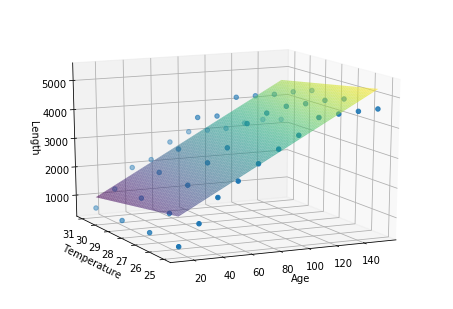

In [10]:
# Now we can get the Z axis values by using our equation and the co-efficients from the 2nd non-normalized model
xA1, xA2 = np.meshgrid(np.linspace(x06["A1"].min(), x06["A1"].max(), 100),
np.linspace(x06["A2"].min(), x06["A2"].max(), 100))
Z = model.params[0] + model.params[1] * xA1 + model.params[2] * xA2

# Make a 3D axis
fig = plt.figure(figsize=(6, 4))
ax1 = Axes3D(fig, azim=-115, elev=15)

# Plot the fit "plane" we got via the model
ax1.plot_surface(xA1, xA2, Z, cmap="viridis", alpha=0.6, linewidth=0)

# Plot the original data points for comparison
ax1.scatter(x06["A1"], x06["A2"], x06["B"])
ax1.set_xlabel("Age")
ax1.set_ylabel("Temperature")
ax1.set_zlabel("Length")
plt.show()